<big>

## Why study Statistics? <br>

The world around us, its natural processes and the behavior of the living things that inhabit it are all data generating machines to a statistician. Every time you post something on Social Media or shop online or buy a ticket to a concert or take the train to work or click on an advertisement – you produce data points. This data contains within itself moving snapshots of real-world processes and an understanding of these could potentially help you understand the past and, with some luck, predict the future.


---

## What is Statistics?

In a nutshell, statistics is a set of tools and procedures that help us in

- summarizing or **explaining complex phenomena** using simple, reasonable probability **models** (model *fitting*)
- Infer **underlying parameters** that may have generated the data
- generating **knowledge** about a population by analyzing **noisy** data from a sample (*inference*)
- **Make predictions** about unobserved data, or expected future observations.


There are many different **types** of questions that statistics can help us answer

- **Descriptive** to summarize a characteristic of a set of data
- **Exploratory** to identify patterns, trends, or relationships between variables
- **Inferential** to test a hypotheses

- **Predictive**  to forecast an unknown value or label for a case using a model build on a training set

- **Causal** to investigate whether changing one factor will change another factor in a population
- **Deterministic** to establish *how* the change in one factor results in change in another factor in a population - to determine the exact mechanism"

---

Much of the practical (and business) use statistics deals with the measurement of differences between groups on a metric of interest 

- Does one medicine work better than another? 
- Do cells with one version of a gene synthesize more of an enzyme than cells with another version? 
- Does one kind of signal processing algorithm detect pulsars better than another? 
- Is one catalyst more effective at speeding a chemical reaction than another? 
- Do girls perform better than boys in the CBSE board?
- Do IITans make more money than BITSians?
- Does lowering the consumption of salt in your diet affect your blood pressure?
- Do first babies arrive late?
- Do Amir Khan's movies make more money at the box office than Salman Khan's?
- Is the level of pollution in the Yamuna higher in Delhi than in Allahabad?

To answer these questions, we would collect data and put them in a form that is easy to summarize, visualize, and discuss. Loosely speaking, the collection and aggregation of data result in a distribution. Distributions are most often in the form of a histogram or a table. That way, we can "see" the data immediately and begin our scientific inquiry.

---

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from pandas import Series, DataFrame
%matplotlib inline

from scipy.stats import norm, gamma, beta

<big>
Useful Libraries for this Module

- `np.random.`
- `scipy.stats`

---

## Example: Univariate (one variable) Analysis

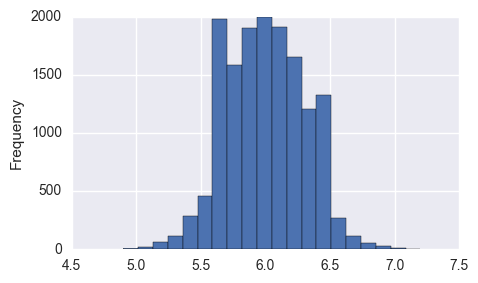

In [5]:
# The Bell Curve (Normal distribution, Gaussian)
Series(norm.rvs(6, 0.3, 15000)).round(1).plot.hist(bins=20, figsize=(5, 3));

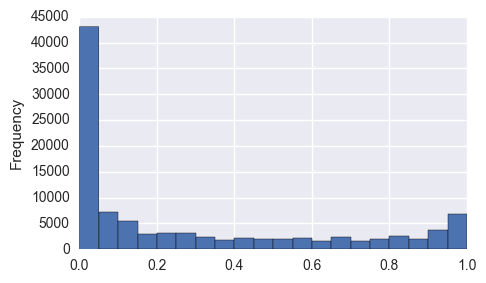

In [9]:
# The Beta Distribution
Series(np.random.beta(0.2, 0.5, 10**5).round(2)).plot.hist(bins=20, figsize=(5, 3));

In [11]:
# Fitting 1
x = np.linspace(-1, 1, 100)
Series(-x**3 + x**2).plot(figsize=(5, 3));

In [14]:
# Fitting 2
df = pd.DataFrame()

for a in np.arange(0, 2, 0.2):
    for b in np.arange(0, 5, 0.5):
        try:
            df[str(a) + '_' + str(b)] = beta.rvs(a, b, size=1000)
        except:
            continue
            
df.iloc[:, 4].plot.kde(style='r-')
df.iloc[:, 25].plot.kde(style='b-')
df.iloc[:, 50].plot.kde(style='k-')
df.iloc[:, 75].plot.kde(style='g-');            

---
## Example: Bivariate Analysis

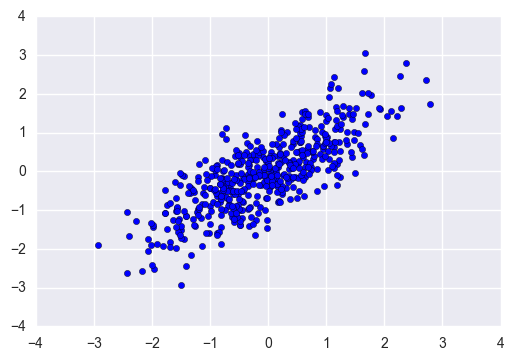

In [22]:
r = 0.8
data = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], size=500)
df = DataFrame(data, columns=['x', 'y'])

plt.scatter(df['x'], df['y']);

In [23]:
plt.scatter(df['x'], df['y'])

# take a few points and draw some lines with varying slopes
Lx = map(lambda i: np.arange(i-1, 3, 0.5), df.sort_values('x')[:5]['x'])
for i, m in enumerate(np.arange(0.3, 1.6, 0.3)):
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.plot(Lx[i], (m * Lx[i]))

---
<big>

## 1. Summarising Distributions

- Problem: Given a bunch of datapoints:
    - characterize the distribution in one or two values
    - Characterization should be robust to outliers
    
---    

In [ ]:
dummyArray = np.random.randn(16).reshape(4, 4)

In [ ]:
dummyArray

In [ ]:
print(np.mean(dummyArray))
print(np.median(dummyArray))

---

<big>

## The Mean

- Represents center of mass
- If the values are close together this is a good representative
- There will ALWAYS exist a mean - but it will not always be helpful.
- Influenced by Outliers

## The Median

- 50th Percentile
- A Median always exists
- Median is not unique
- Can be computed in linear time
- Not influenced by outliers (robust)

## Percentiles

- Classical summary statistics good for describing the body of the distribution
- Need information about the tail of the distributions
- Determine outliers in a dataset

In [ ]:
np.percentile(dummyArray, [35, 45, 65])

---

<big>

**Applications in Data Cleaning:**

- Identifying outliers.
- Treat outliers by capping them at 5th and 95th percentiles.

**What is the IQR?**

- The interquartile range of a sample X is defined as: `IQR(X) = Q(0.75,X) - Q(0.25,X)`
- It is a robust measure for variance of the data. 
- Good alternative to standard / mean deviation.

**What is an outlier?**

- Def. (Tukey, 1969) a k-outlier is a data point X which is either
    - larger than `Q(0.75) + k * IQR(X)` or
    - smaller than `Q(0.25) - k * IQR(X)`
    
---    

---

<big>

## Standard Deviation

- Measure the 'typical' displacement from the mean value.
- Standard deviation is popular because it has extremely nice mathematical properties.
- Standard deviation is a good deviation for normal distributed data
- Large effect on Outliers

## Caution with Standard Deviation
Everybody Learns about standard deviation in school

> Beautiful mathematical properties!

Everybody knows

- "68% of data falls within 1 std-dev of the mean"
- "95% falls within 2 std-dev of the mean"
- "99.7" falls within 3 std-dev of the mean"

> "Problem is: this is utter nonsense". Only true for normally distributed data.

- Not good for measuring outliers!

---

In [28]:
snd = Series(np.random.randn(10000))

In [29]:
m = snd.mean()
sd = snd.std()

In [30]:
1 - ((snd > m + 3 * sd).astype(int).sum() + (snd < m - 3 * sd).astype(int).sum())/10000.0

0.9973

---

<big>

# Common Probability Distributions with NumPy

<img src = 'http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png'>

## Normal

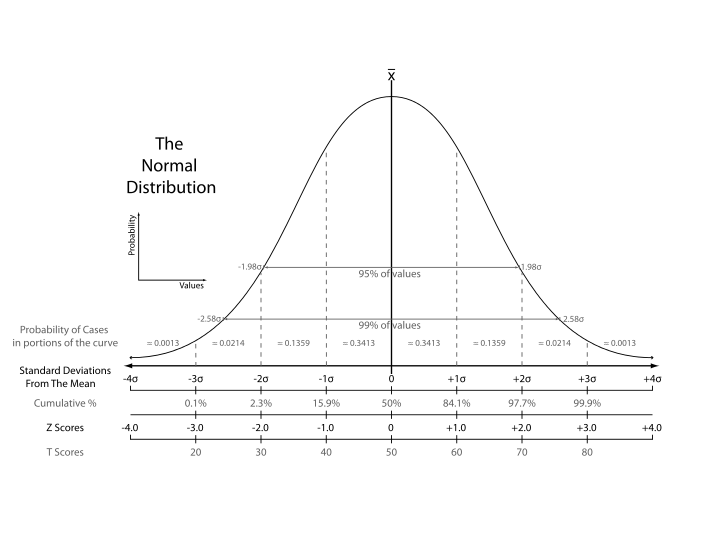

In [31]:
from IPython.display import Image
url='http://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/725px-The_Normal_Distribution.svg.png'
Image(url,height=400,width=600)

`np.random.normal
np.random.rnorm
scipy.stats.norm.rvs`

In [ ]:
normalArray = np.random.normal(0, 1, 10000)

In [ ]:
normalArray.mean()

In [ ]:
normalArray.std()

In [ ]:
pl.hist(normalArray, 
        bins=20);

---

## Poisson

https://en.wikipedia.org/wiki/Poisson_distribution#Probability_of_events_for_a_Poisson_distribution

In [ ]:
np.random.poisson?

In [ ]:
from scipy.stats import poisson

In [ ]:
pois_arr = np.random.poisson(1, 10000)

In [ ]:
pl.hist(pois_arr,  bins=30);

In [ ]:
np.mean(pois_arr)

In [ ]:
np.std(pois_arr)

---
### Pareto Distribution

https://en.wikipedia.org/wiki/Pareto_distribution

In [ ]:
from scipy.stats import pareto
pareto_arr = pareto.rvs(25, size=10000)

In [ ]:
pl.hist(pareto_arr, bins=50);

---
## Binomial

https://en.wikipedia.org/wiki/Binomial_distribution

In [ ]:
np.random.binomial?

In [ ]:
binom_arr = np.random.binomial(100, 0.5, size=1000)

In [ ]:
binom_arr.shape

In [ ]:
pd.Series(binom_arr).plot(kind='hist', bins=40);

In [ ]:
from scipy import stats
stats.describe(binom_arr)

---
### Bimodal (two peaks) Normal Curve

In [ ]:
twoNormalArrays = np.array([np.random.normal(0, 2, 10000), np.random.normal(10, 4, 10000)])

In [ ]:
twoNormalArrays = twoNormalArrays.flatten()

In [ ]:
pd.Series(twoNormalArrays).plot(kind='hist', bins=80);

In [ ]:
stats.describe(twoNormalArrays)